<a href="https://colab.research.google.com/github/abhhiixxhek/Instragram-Reach-Prediction/blob/main/instagramReach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libraries**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import chardet

**Loading The Dataset**

In [38]:
with open('/content/Instagram data.csv', 'rb') as f:
  encoding = chardet.detect(f.read())['encoding']

In [39]:
data = pd.read_csv('/content/Instagram data.csv', encoding=encoding)

In [42]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
0,3920,2586,1028,619,56,98,9,5,162,35,2
1,5394,2727,1838,1174,78,194,7,14,224,48,10
2,4021,2085,1188,0,533,41,11,1,131,62,12
3,4528,2700,621,932,73,172,10,7,213,23,8
4,2518,1704,255,279,37,96,5,4,123,8,0


In [44]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Impressions     119 non-null    int64
 1   From Home       119 non-null    int64
 2   From Hashtags   119 non-null    int64
 3   From Explore    119 non-null    int64
 4   From Other      119 non-null    int64
 5   Saves           119 non-null    int64
 6   Comments        119 non-null    int64
 7   Shares          119 non-null    int64
 8   Likes           119 non-null    int64
 9   Profile Visits  119 non-null    int64
 10  Follows         119 non-null    int64
dtypes: int64(11)
memory usage: 10.4 KB


**Data Visualisation**

<ipython-input-46-6d2a0b1aefb8>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




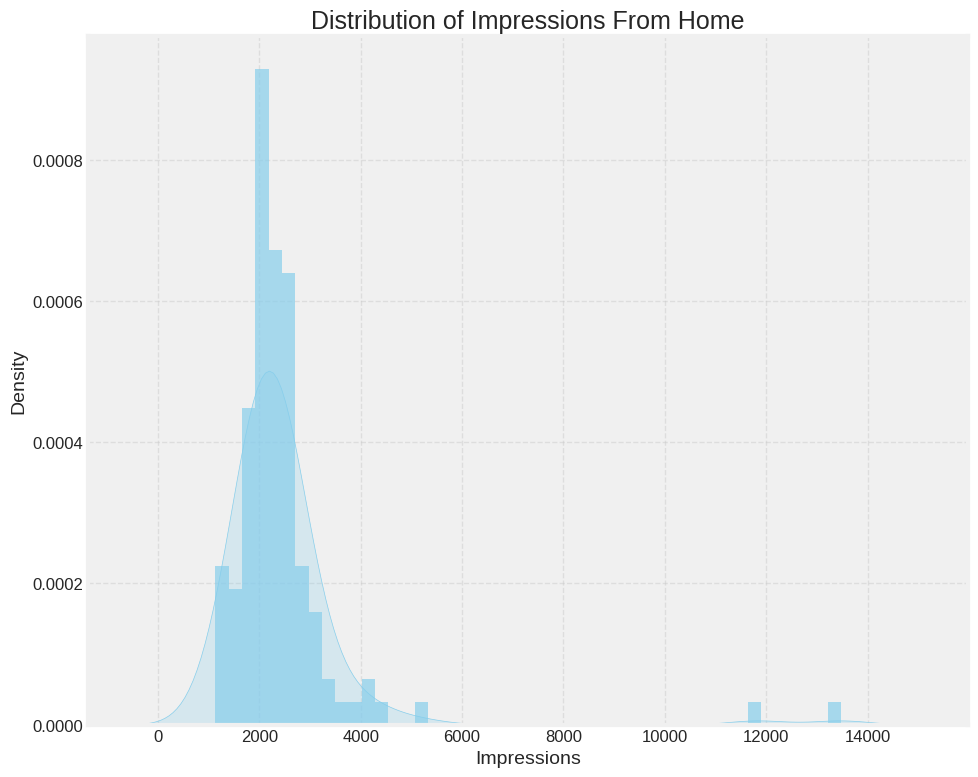

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home", fontsize=18)
sns.distplot(data['From Home'], color='skyblue', kde_kws={'shade': True}, hist_kws={"linewidth": 2, "alpha": 0.7})
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Impressions", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-47-1f322df1231e>:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



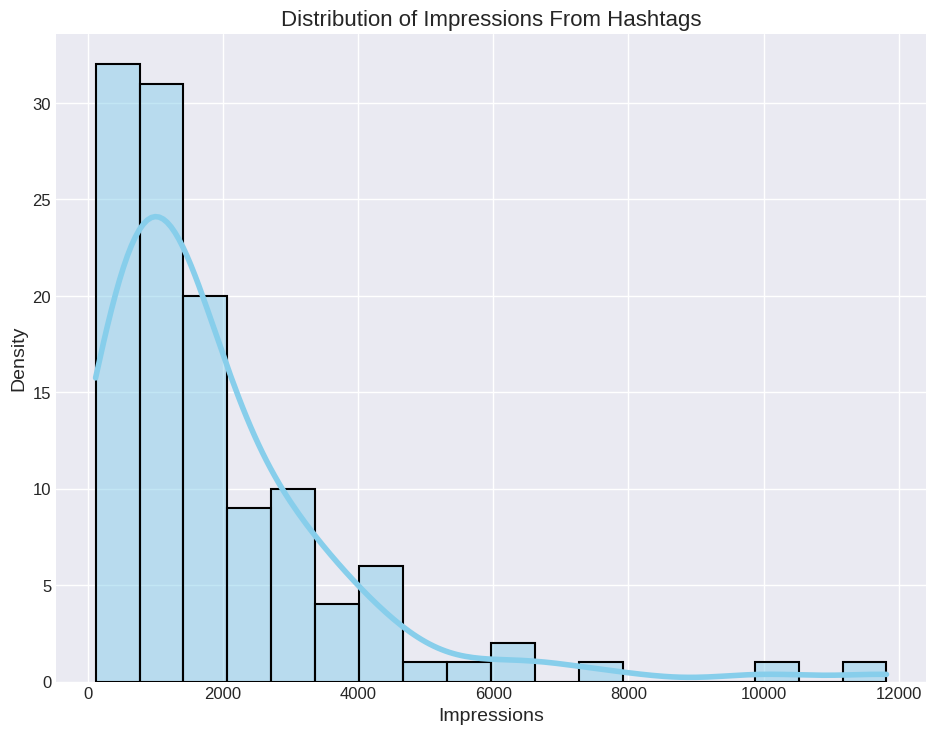

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the figure and axes objects
plt.figure(figsize=(10, 8))

# Plot the distribution
sns.histplot(data['From Hashtags'], kde=True, color='skyblue', edgecolor='black', linewidth=1.5)

# Add title and labels
plt.title("Distribution of Impressions From Hashtags", fontsize=16)
plt.xlabel("Impressions", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


<ipython-input-48-614c1ea0d248>:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



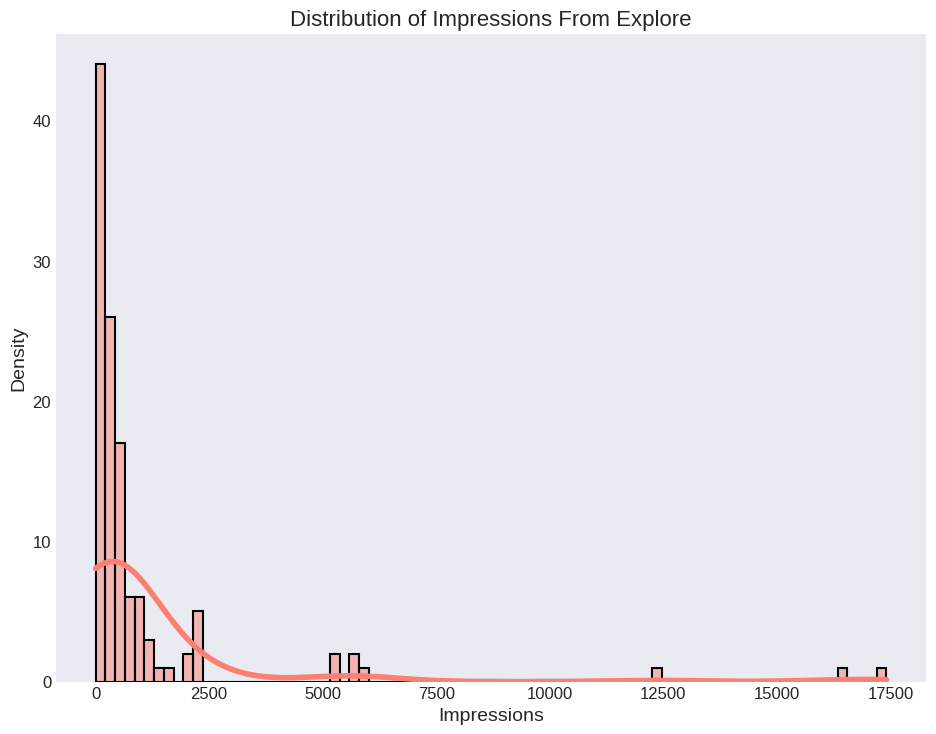

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-dark')

# Create the figure and axes objects
plt.figure(figsize=(10, 8))

# Plot the distribution
sns.histplot(data['From Explore'], kde=True, color='salmon', edgecolor='black', linewidth=1.5)

# Add title and labels
plt.title("Distribution of Impressions From Explore", fontsize=16)
plt.xlabel("Impressions", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


In [49]:
import plotly.express as px

# Calculate the sum of impressions from each source
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

# Create labels and values for the pie chart
labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

# Create the pie chart
fig = px.pie(names=labels, values=values,
             title='Impressions on Instagram Posts From Various Sources',
             hole=0.5)

# Customize layout and aesthetics
fig.update_traces(marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(font=dict(family="Arial", size=14),
                  title=dict(font=dict(size=20)),
                  legend=dict(font=dict(size=12)),
                  margin=dict(l=20, r=20, t=60, b=20),
                  paper_bgcolor='white',
                  plot_bgcolor='white',
                  )

# Show the pie chart
fig.show()


In [50]:
import plotly.express as px

# Create a scatter plot with trendline
figure = px.scatter(data_frame=data, x="Impressions", y="Likes", size="Likes",
                    trendline="ols", title="Relationship Between Likes and Impressions")

# Customize plot appearance
figure.update_traces(marker=dict(color='skyblue', line=dict(width=1, color='DarkSlateGray'), opacity=0.8),
                     selector=dict(mode='markers'))

figure.update_layout(title=dict(font=dict(size=20)),  # Increase title font size
                      xaxis_title="Impressions", yaxis_title="Likes",  # Axis labels
                      font=dict(family="Arial", size=12),  # Font style and size
                      showlegend=False,  # Hide legend
                      plot_bgcolor='white',  # Plot background color
                      xaxis=dict(showgrid=True, gridcolor='lightgray'),  # Customize x-axis grid
                      yaxis=dict(showgrid=True, gridcolor='lightgray'),  # Customize y-axis grid
                      hovermode='closest',  # Hover mode
                      margin=dict(l=80, r=80, t=80, b=80),  # Margin around the plot
                      )

# Show the updated plot
figure.show()


In [51]:
import plotly.express as px

# Create the scatter plot with trendline
figure = px.scatter(data_frame=data, x="Impressions", y="Comments", size="Comments",
                    trendline="ols", title="Relationship Between Comments and Total Impressions")

# Customize plot appearance
figure.update_traces(marker=dict(color='lightseagreen', line=dict(width=1, color='DarkSlateGray'), opacity=0.8),
                     selector=dict(mode='markers'))

figure.update_layout(title=dict(font=dict(size=20)),  # Increase title font size
                     xaxis_title="Total Impressions", yaxis_title="Comments",  # Axis labels
                     font=dict(family="Arial", size=12),  # Font style and size
                     showlegend=False,  # Hide legend
                     plot_bgcolor='white',  # Plot background color
                     xaxis=dict(showgrid=True, gridcolor='lightgray'),  # Customize x-axis grid
                     yaxis=dict(showgrid=True, gridcolor='lightgray'),  # Customize y-axis grid
                     hovermode='closest',  # Hover mode
                     margin=dict(l=80, r=80, t=80, b=80),  # Margin around the plot
                     )

# Show the updated plot
figure.show()


In [52]:
import plotly.express as px

# Create the scatter plot with trendline
figure = px.scatter(data_frame=data, x="Impressions", y="Shares", size="Shares",
                    trendline="ols", title="Relationship Between Shares and Total Impressions")

# Customize plot appearance
figure.update_traces(marker=dict(color='salmon', line=dict(width=1, color='DarkSlateGray'), opacity=0.8),
                     selector=dict(mode='markers'))

figure.update_layout(title=dict(font=dict(size=20)),  # Increase title font size
                     xaxis_title="Total Impressions", yaxis_title="Shares",  # Axis labels
                     font=dict(family="Arial", size=12),  # Font style and size
                     showlegend=False,  # Hide legend
                     plot_bgcolor='white',  # Plot background color
                     xaxis=dict(showgrid=True, gridcolor='lightgray'),  # Customize x-axis grid
                     yaxis=dict(showgrid=True, gridcolor='lightgray'),  # Customize y-axis grid
                     hovermode='closest',  # Hover mode
                     margin=dict(l=80, r=80, t=80, b=80),  # Margin around the plot
                     )

# Show the updated plot
figure.show()


In [53]:
import plotly.express as px

# Create the scatter plot with trendline
figure = px.scatter(data_frame=data, x="Impressions", y="Saves", size="Saves",
                    trendline="ols", title="Relationship Between Post Saves and Total Impressions")

# Customize plot appearance
figure.update_traces(marker=dict(color='lightgreen', line=dict(width=1, color='DarkSlateGray'), opacity=0.8),
                     selector=dict(mode='markers'))

figure.update_layout(title=dict(font=dict(size=20)),  # Increase title font size
                     xaxis_title="Total Impressions", yaxis_title="Saves",  # Axis labels
                     font=dict(family="Arial", size=12),  # Font style and size
                     showlegend=False,  # Hide legend
                     plot_bgcolor='white',  # Plot background color
                     xaxis=dict(showgrid=True, gridcolor='lightgray'),  # Customize x-axis grid
                     yaxis=dict(showgrid=True, gridcolor='lightgray'),  # Customize y-axis grid
                     hovermode='closest',  # Hover mode
                     margin=dict(l=80, r=80, t=80, b=80),  # Margin around the plot
                     )

# Show the updated plot
figure.show()


<ipython-input-54-d336fe693882>:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-54-d336fe693882>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-54-d336fe693882>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-54-d336fe693882>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-54-d336fe

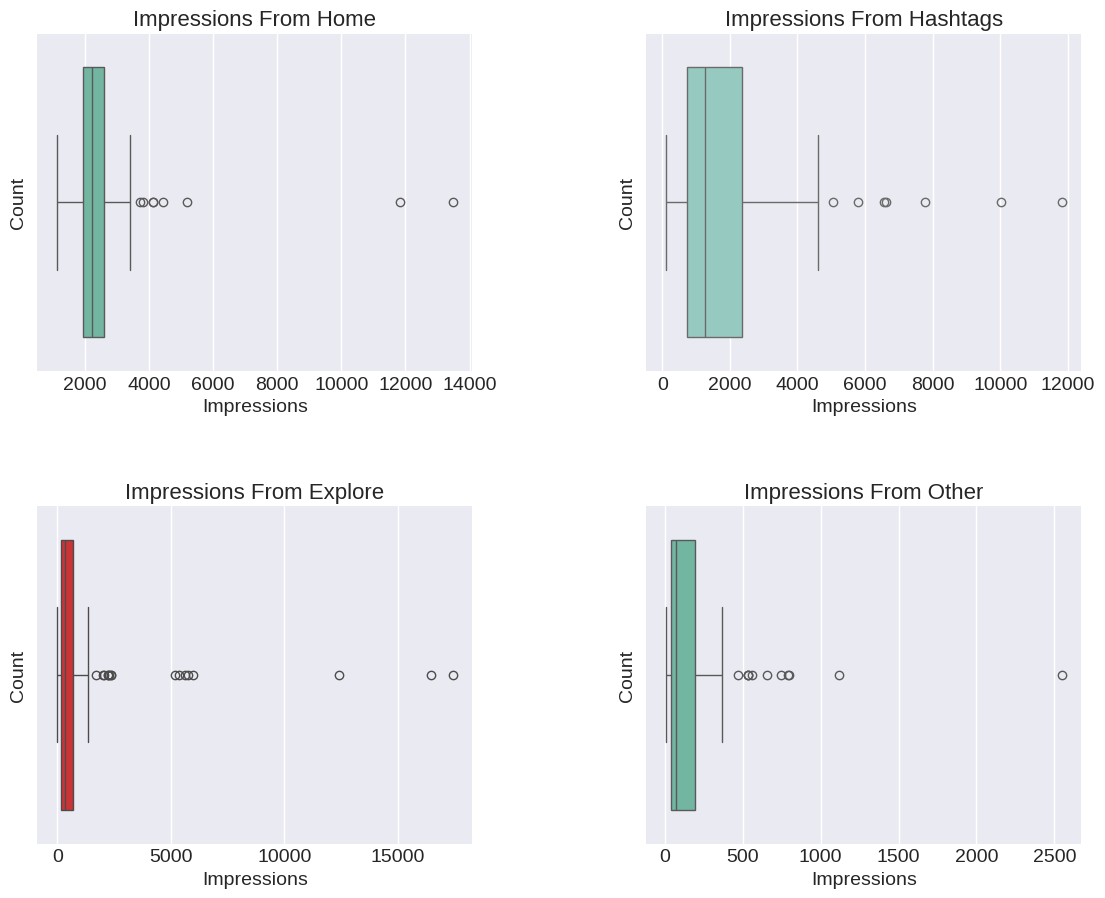

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-darkgrid')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Boxplot for impressions from home
sns.boxplot(ax=axes[0, 0], x=data["From Home"], palette="Set2")
axes[0, 0].set_title("Impressions From Home", fontsize=16)
axes[0, 0].set_xlabel("Impressions", fontsize=14)
axes[0, 0].set_ylabel("Count", fontsize=14)

# Boxplot for impressions from hashtags
sns.boxplot(ax=axes[0, 1], x=data["From Hashtags"], palette="Set3")
axes[0, 1].set_title("Impressions From Hashtags", fontsize=16)
axes[0, 1].set_xlabel("Impressions", fontsize=14)
axes[0, 1].set_ylabel("Count", fontsize=14)

# Boxplot for impressions from explore
sns.boxplot(ax=axes[1, 0], x=data["From Explore"], palette="Set1")
axes[1, 0].set_title("Impressions From Explore", fontsize=16)
axes[1, 0].set_xlabel("Impressions", fontsize=14)
axes[1, 0].set_ylabel("Count", fontsize=14)

# Boxplot for impressions from other
sns.boxplot(ax=axes[1, 1], x=data["From Other"], palette="Set2")
axes[1, 1].set_title("Impressions From Other", fontsize=16)
axes[1, 1].set_xlabel("Impressions", fontsize=14)
axes[1, 1].set_ylabel("Count", fontsize=14)

# Show the plots
plt.show()


Impressions       int64
From Home         int64
From Hashtags     int64
From Explore      int64
From Other        int64
Saves             int64
Comments          int64
Shares            int64
Likes             int64
Profile Visits    int64
Follows           int64
dtype: object
Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


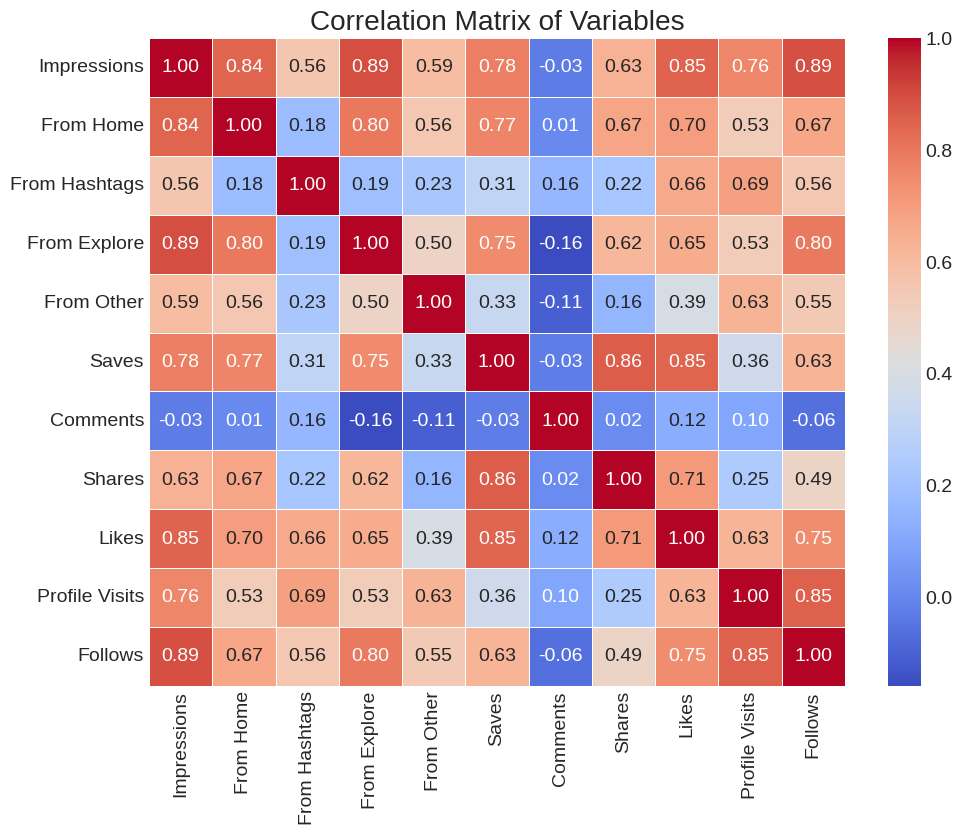

In [55]:
import pandas as pd

# Check data types of columns
print(data.dtypes)

# Convert non-numeric columns to numeric if possible
# For example, if you have columns with string data that can be converted to numeric, you can use pd.to_numeric()

# Exclude non-numeric columns and calculate correlation matrix
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation = numeric_data.corr()

# Sort correlations with respect to "Impressions"
sorted_correlation = correlation["Impressions"].sort_values(ascending=False)

# Print the sorted correlation values
print(sorted_correlation)

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Variables")
plt.show()


In [56]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [57]:
import plotly.express as px

# Create the scatter plot with trendline
figure = px.scatter(data_frame=data, x="Profile Visits", y="Follows", size="Follows",
                    trendline="ols", title="Relationship Between Profile Visits and Followers Gained")

# Customize plot appearance
figure.update_traces(marker=dict(color='skyblue', line=dict(width=1, color='DarkSlateGray'), opacity=0.8),
                     selector=dict(mode='markers'))

figure.update_layout(title=dict(font=dict(size=20)),  # Increase title font size
                     xaxis_title="Profile Visits", yaxis_title="Follows",  # Axis labels
                     font=dict(family="Arial", size=12),  # Font style and size
                     showlegend=False,  # Hide legend
                     plot_bgcolor='white',  # Plot background color
                     xaxis=dict(showgrid=True, gridcolor='lightgray'),  # Customize x-axis grid
                     yaxis=dict(showgrid=True, gridcolor='lightgray'),  # Customize y-axis grid
                     hovermode='closest',  # Hover mode
                     margin=dict(l=80, r=80, t=80, b=80),  # Margin around the plot
                     )

# Show the updated plot
figure.show()


**Instagram Reach Prediction Models**

In [58]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

# Initialize and train Passive Aggressive Regressor model
pa_model = PassiveAggressiveRegressor()
pa_model.fit(xtrain, ytrain)

# Evaluate Passive Aggressive Regressor model
pa_score = pa_model.score(xtest, ytest)
print("Passive Aggressive Regressor Accuracy:", pa_score)


# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(xtrain, ytrain)

# Evaluate Linear Regression model
linear_score = linear_model.score(xtest, ytest)
print("Linear Regression Accuracy:", linear_score)

# Initialize and train Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)

# Evaluate Random Forest Regression model
rf_score = rf_model.score(xtest, ytest)
print("Random Forest Regression Accuracy:", rf_score)


Passive Aggressive Regressor Accuracy: 0.8199077779630769
Linear Regression Accuracy: 0.8777977785012779
Random Forest Regression Accuracy: 0.8876061052821274


In [63]:
# Input features
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])

# Predict with PassiveAggressiveRegressor
pa_prediction = pa_model.predict(features)
print("PassiveAggressiveRegressor Prediction:", pa_prediction)

# Predict with Linear Regression
linear_prediction = linear_model.predict(features)
print("Linear Regression Prediction:", linear_prediction)

# Predict with Random Forest Regression
rf_prediction = rf_model.predict(features)
print("Random Forest Regression Prediction:", rf_prediction)


PassiveAggressiveRegressor Prediction: [11115.84761881]
Linear Regression Prediction: [11139.58239766]
Random Forest Regression Prediction: [11595.94]
